In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
etf_names = ["TAN", "LIT", "KARS", "XOP", "HAIL", "IXC", "FAN", "PICK", "FCG", "TSLA"]
file_names = [f"Data/{ticker}.csv" for ticker in etf_names]
columns_to_drop = ["High", "Low", "Dividends", "Volume", "Stock Splits", "Capital Gains"]
cols = [f"Return_{ticker}" for ticker in etf_names if ticker != "TSLA"]
cols_2 = [f"Rolling_Mean_{ticker}" for ticker in etf_names if ticker != "TSLA"]

In [3]:
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

for symbol in etf_names:
    stock = yf.Ticker(symbol)
    
    historical_data = stock.history(start=start_date, end=end_date)
    
    filename = f"Data/{symbol}.csv"
    historical_data.to_csv(filename)

In [4]:
dfs = []
window_size = 2
for file_name, etf_name in zip(file_names, etf_names):
    df = pd.read_csv(file_name).drop(columns = columns_to_drop, errors='ignore')
    df["Return"] = (df["Close"] - df["Open"])/df["Open"] * 100
    df['Rolling_Mean'] = df['Return'].rolling(window=window_size).mean()
    df.rename(columns={'Open': 'Open_' + etf_name, 'Close': 'Close_' + etf_name, 'Return': 'Return_' + etf_name, "Rolling_Mean": "Rolling_Mean_" + etf_name}, inplace=True)
    dfs.append(df)

etfs = dfs[0]
for df, etf_name in zip(dfs[1:-1], etf_names[1:-1]):
    etfs = pd.merge(etfs, df, on="Date", how="outer", suffixes=('', '_' + etf_name))
    
tsla = dfs[-1]


In [5]:
etfs

,Date,Open_TAN,Close_TAN,Return_TAN,Rolling_Mean_TAN,Open_LIT,Close_LIT,Return_LIT,Rolling_Mean_LIT,Open_KARS,...,Return_FAN,Rolling_Mean_FAN,Open_PICK,Close_PICK,Return_PICK,Rolling_Mean_PICK,Open_FCG,Close_FCG,Return_FCG,Rolling_Mean_FCG
0,2020-01-02 00:00:00-05:00,31.290924,31.879812,1.881978,NaN,26.907331,26.907331,0.000000,NaN,22.005931,...,-0.407889,NaN,24.834174,24.727024,-0.431461,NaN,10.634085,10.380893,-2.380952,NaN
1,2020-01-03 00:00:00-05:00,31.620303,31.670208,0.157826,1.019902,26.557632,26.538204,-0.073155,-0.036577,21.905113,...,-0.548320,-0.478104,24.520969,24.339638,-0.739493,-0.585477,10.695199,10.599161,-0.897956,-1.639454
2,2020-01-06 00:00:00-05:00,31.270961,31.390736,0.383022,0.270424,26.324501,26.654772,1.254613,0.590729,21.877618,...,0.138125,-0.205098,24.084124,24.216002,0.547570,-0.095962,10.712665,10.703934,-0.081501,-0.489729
3,2020-01-07 00:00:00-05:00,31.380755,31.670208,0.922389,0.652705,26.839332,27.014181,0.651467,0.953040,22.005931,...,-0.483090,-0.172482,24.092366,24.257214,0.684231,0.615900,10.712661,10.878546,1.548489,0.733494
4,2020-01-08 00:00:00-05:00,31.670204,32.009563,1.071542,0.996965,26.343928,26.450779,0.405600,0.528533,22.235063,...,0.139369,-0.171860,24.174787,24.487995,1.295599,0.989915,10.843624,10.450739,-3.623187,-1.037349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,2024-04-15 00:00:00-04:00,41.750000,40.599998,-2.754495,-2.833893,44.669998,44.029999,-1.432728,-1.782082,21.719999,...,-1.840892,-1.573187,43.680000,43.049999,-1.442310,-1.860626,27.920000,27.469999,-1.611751,-1.635383
1078,2024-04-16 00:00:00-04:00,40.110001,39.740002,-0.922461,-1.838478,42.860001,42.740002,-0.279979,-0.856353,20.969999,...,-0.469797,-1.155345,42.720001,42.459999,-0.608619,-1.025465,27.280001,27.250000,-0.109973,-0.860862
1079,2024-04-17 00:00:00-04:00,40.099998,40.099998,0.000000,-0.461230,43.189999,43.150002,-0.092607,-0.186293,21.200001,...,0.000000,-0.234898,43.279999,42.799999,-1.109056,-0.858838,27.200001,27.049999,-0.551476,-0.330725
1080,2024-04-18 00:00:00-04:00,40.220001,39.700001,-1.292890,-0.646445,43.209999,42.910000,-0.694282,-0.393445,21.360001,...,0.134045,0.067022,42.919998,42.869999,-0.116494,-0.612775,27.190001,26.980000,-0.772346,-0.661911


In [6]:
tsla

,Date,Open_TSLA,Close_TSLA,Return_TSLA,Rolling_Mean_TSLA
0,2020-01-02 00:00:00-05:00,28.299999,28.684000,1.356893,NaN
1,2020-01-03 00:00:00-05:00,29.366667,29.534000,0.569808,0.963351
2,2020-01-06 00:00:00-05:00,29.364668,30.102667,2.513221,1.541514
3,2020-01-07 00:00:00-05:00,30.760000,31.270666,1.660162,2.086692
4,2020-01-08 00:00:00-05:00,31.580000,32.809334,3.892761,2.776462
...,...,...,...,...,...
1077,2024-04-15 00:00:00-04:00,170.240005,161.479996,-5.145682,-2.947099
1078,2024-04-16 00:00:00-04:00,156.740005,157.110001,0.236057,-2.454813
1079,2024-04-17 00:00:00-04:00,157.639999,155.449997,-1.389243,-0.576593
1080,2024-04-18 00:00:00-04:00,151.250000,149.929993,-0.872732,-1.130987


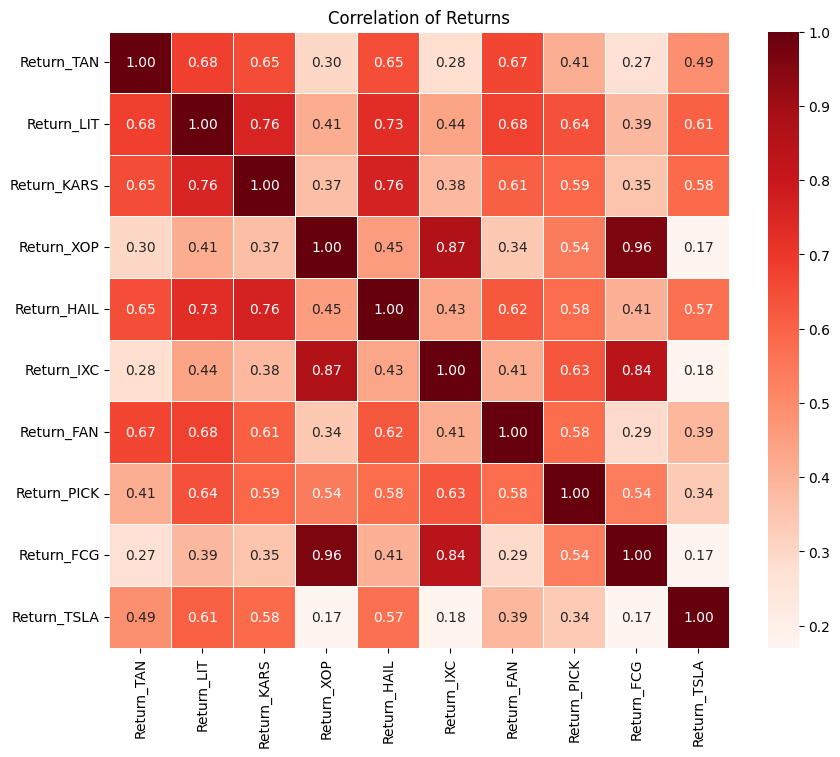

In [7]:
selected_df = etfs[cols].copy()
selected_df["Return_TSLA"] = tsla["Return_TSLA"].copy()

correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Returns')
plt.show()

## Logistic Regression Based on Yesterday's return

In [8]:
X_classification = etfs[cols]
y_classification = [(1 if return_val > 0 else 0) for return_val in tsla['Return_TSLA']]

y_classification = y_classification[1:]
X_classification = X_classification[:-1]

len(y_classification), len(X_classification)

(1081, 1081)

In [9]:
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train_classification = np.array(y_train_classification)
y_test_classification = np.array(y_test_classification)

classifier = LogisticRegression()
classifier.fit(X_train, y_train_classification)

LogisticRegression()

In [10]:
y_pred_classification = classifier.predict(X_test)
classification_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("Classification Accuracy:", classification_accuracy)

Classification Accuracy: 0.5576036866359447


## Random Forest Based on Yesterday's return

In [11]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
random_forest_model.fit(X_train, y_train_classification)

RandomForestClassifier(max_depth=3, random_state=42)

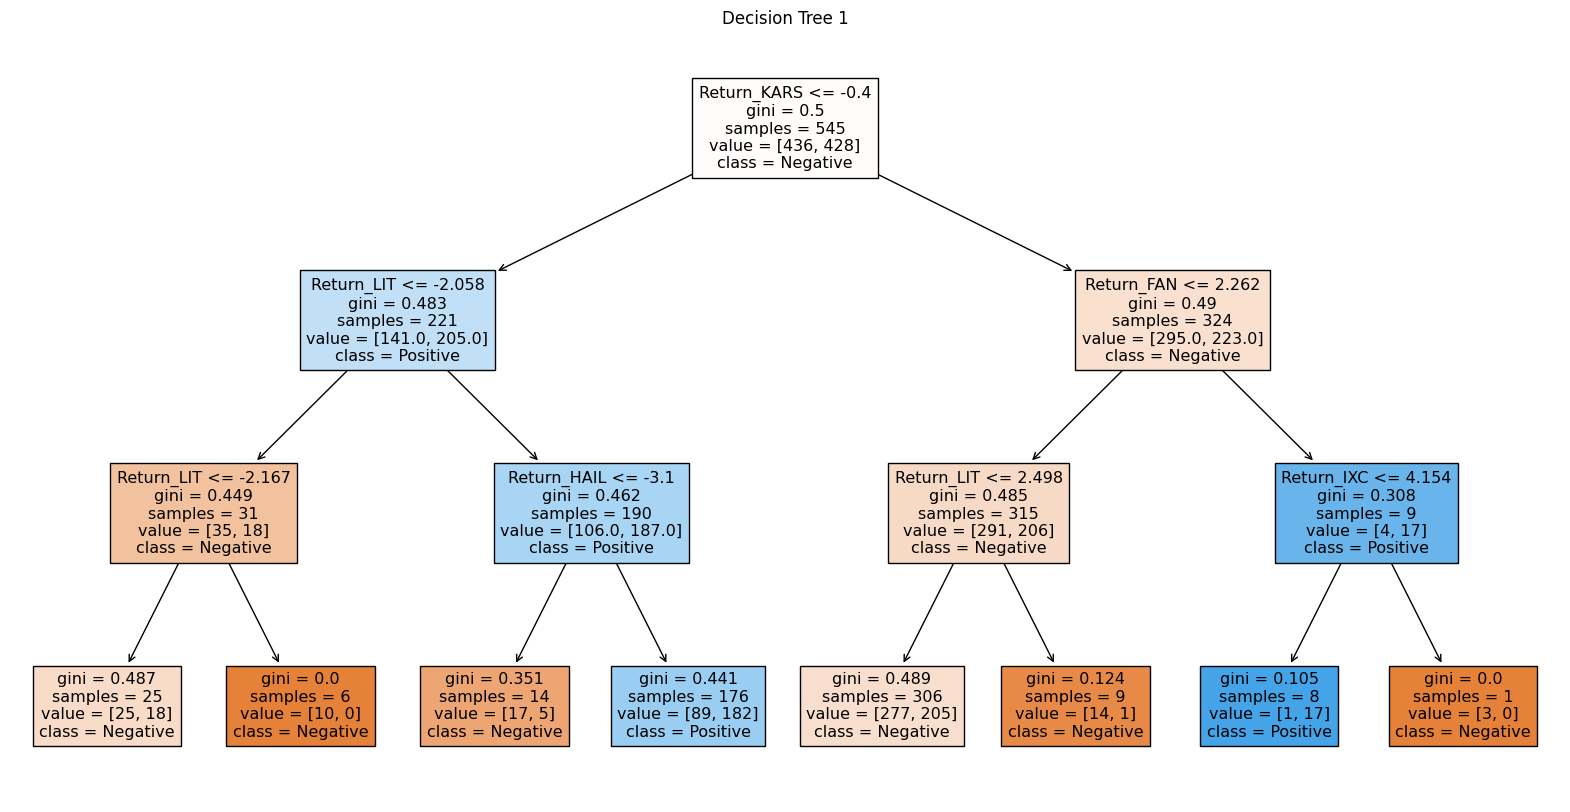

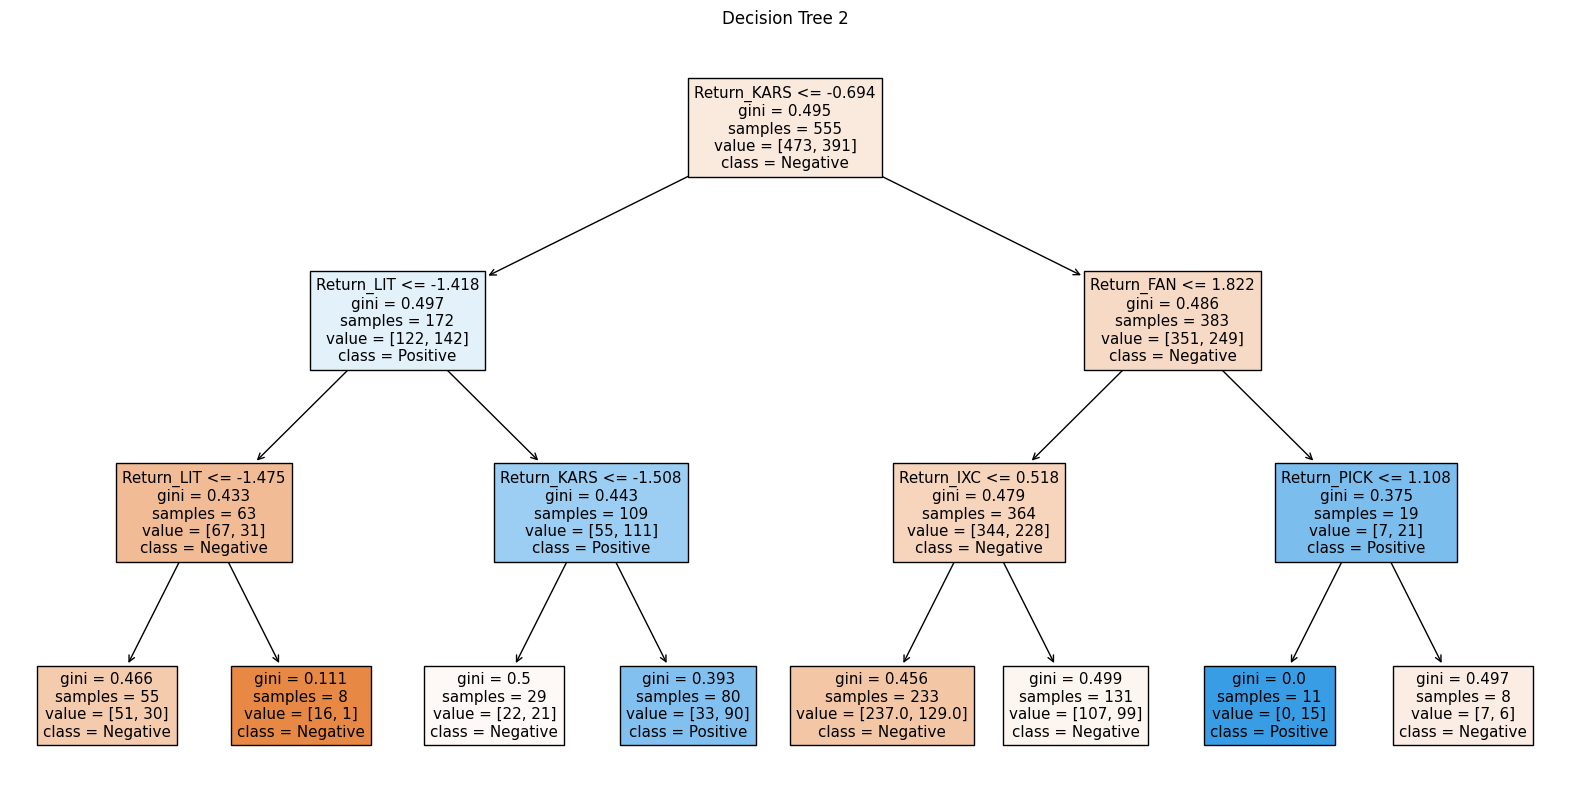

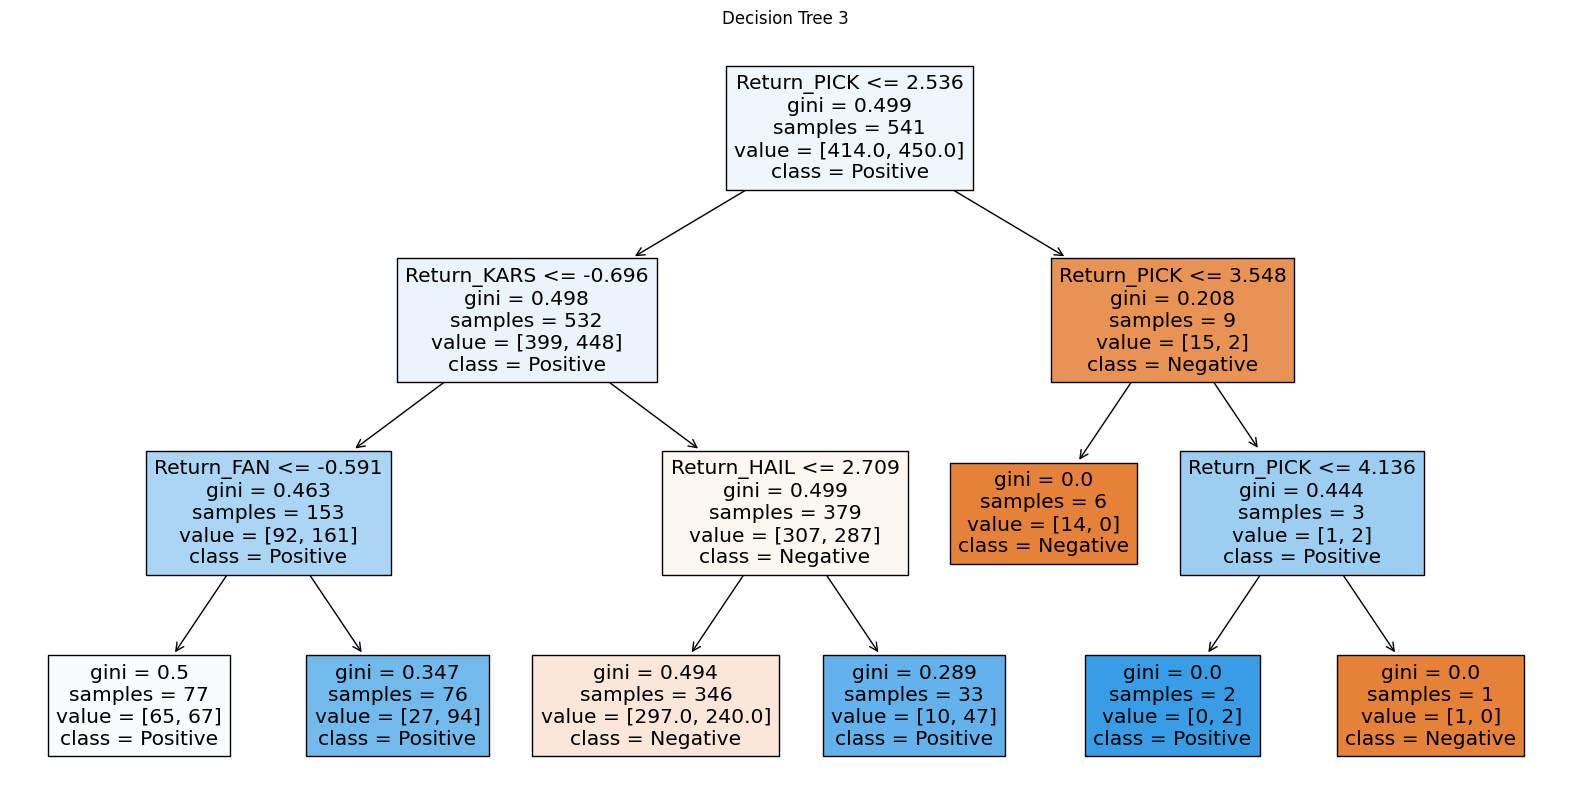

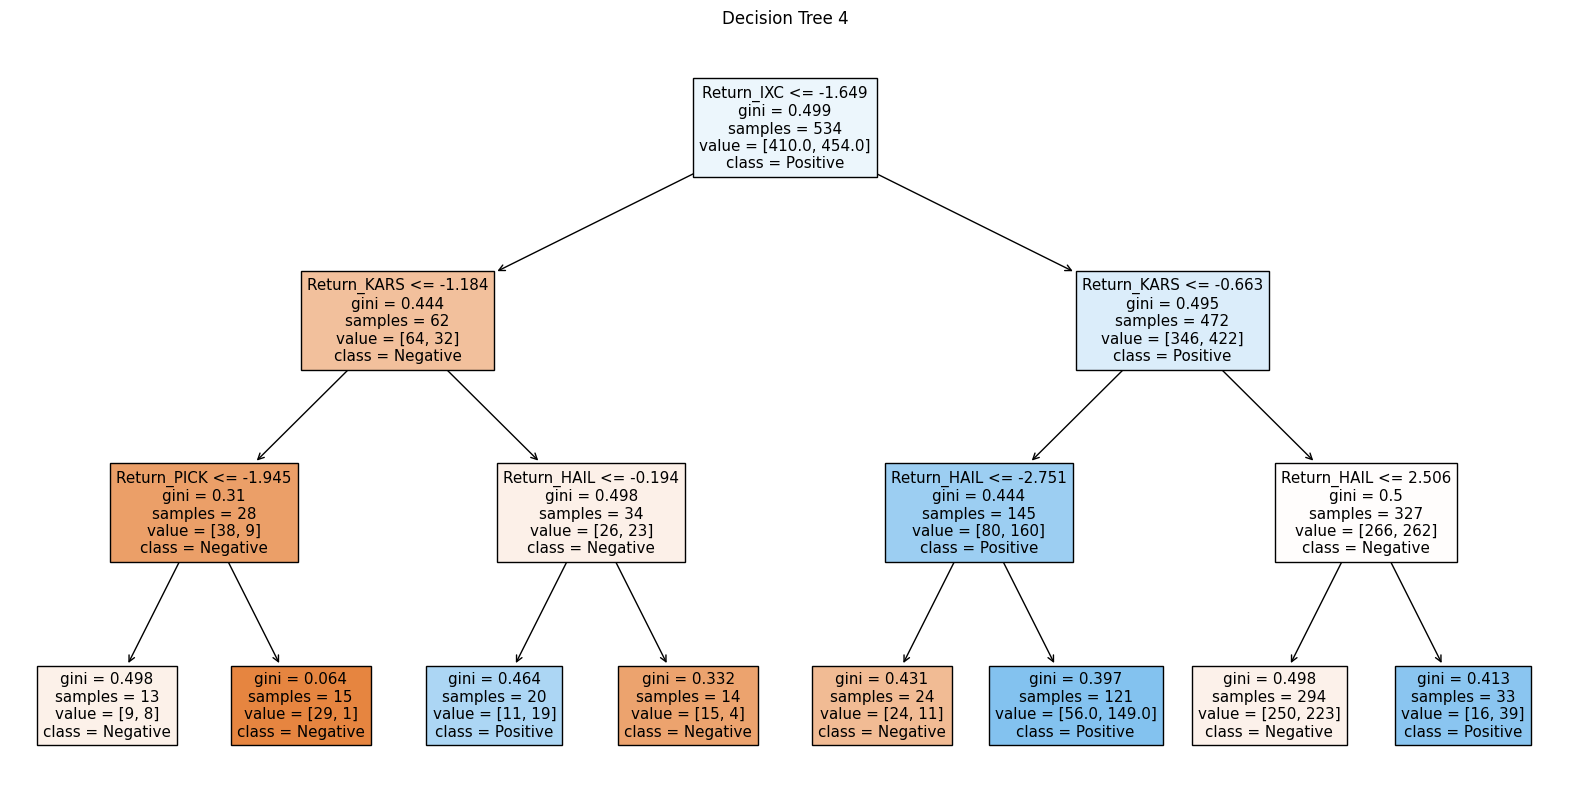

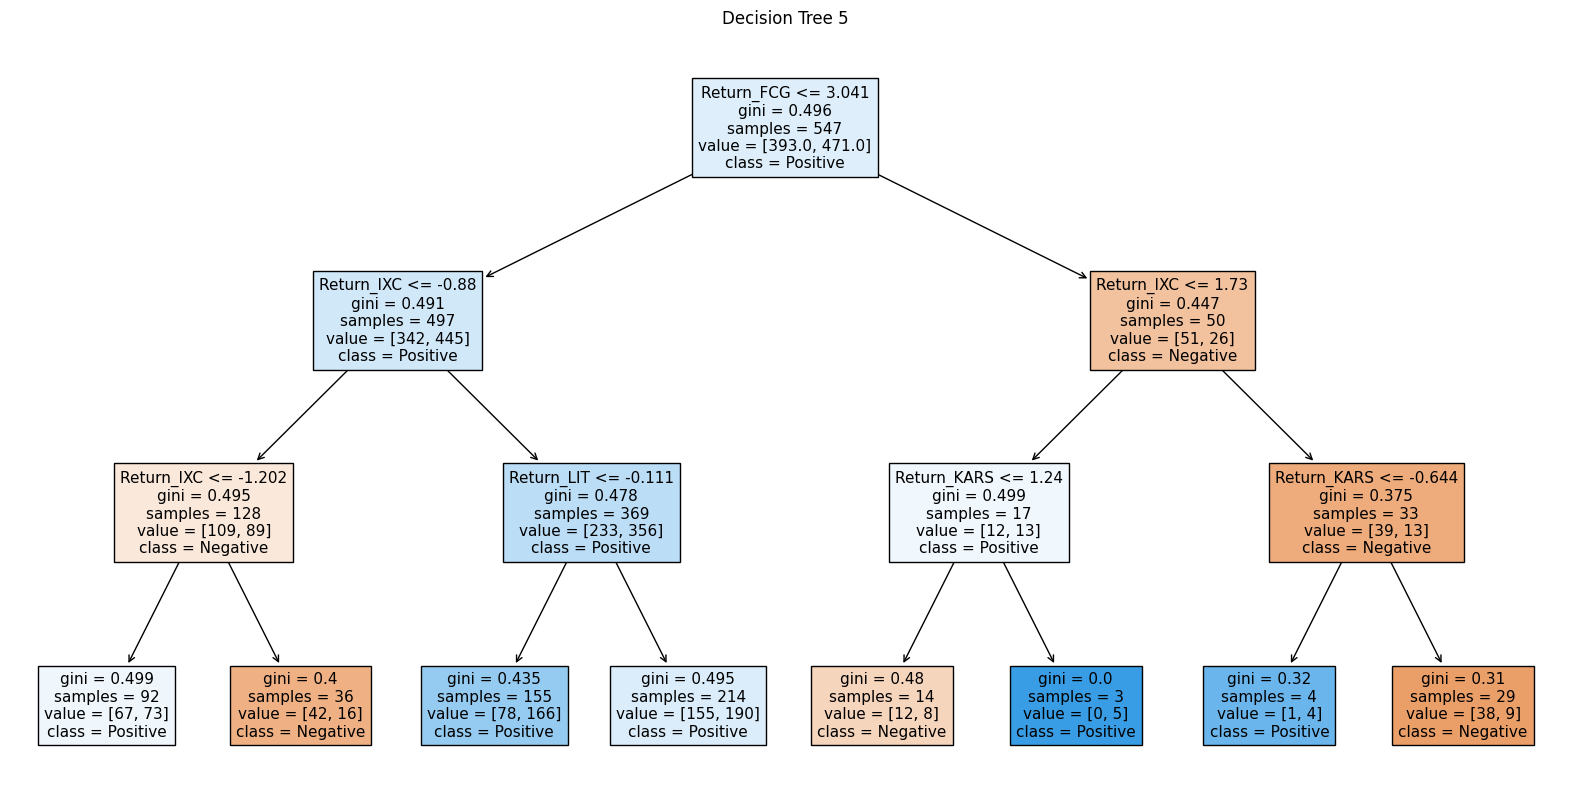

In [12]:
# Define the number of trees to plot
num_trees_to_plot = 5

# Plot the first 'num_trees_to_plot' decision trees in the Random Forest
for i in range(num_trees_to_plot):
    plt.figure(figsize=(20, 10))  # Set the figure size
    plot_tree(random_forest_model.estimators_[i], feature_names=cols, class_names=["Negative", "Positive"], filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

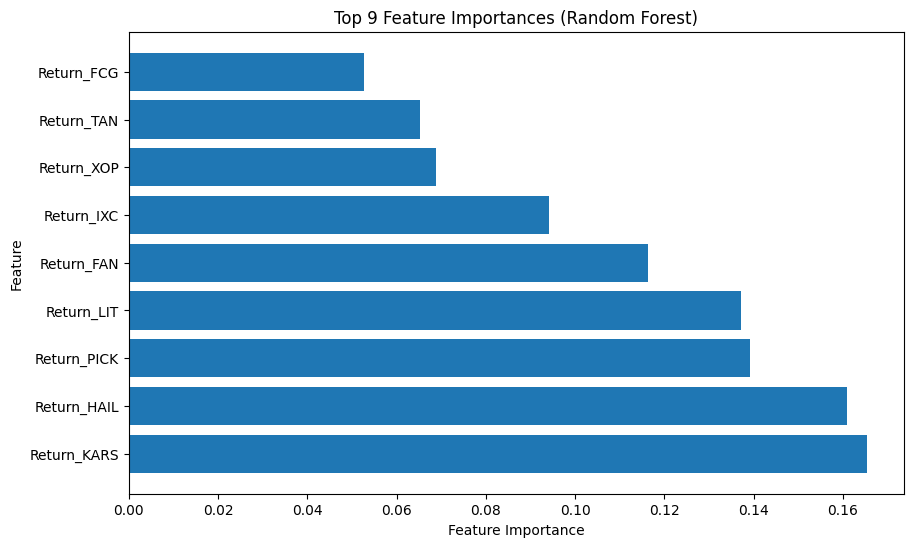

In [13]:
feature_importances = random_forest_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances (Random Forest)'.format(top_n))
plt.show()

In [14]:
y_pred_classification = random_forest_model.predict(X_test)


randomtree_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("RandomTree Accuracy:", randomtree_accuracy)

RandomTree Accuracy: 0.5483870967741935


## Gradient Boosting Classifier Based on Yesterday's return

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train, y_train_classification)

GradientBoostingClassifier(random_state=42)

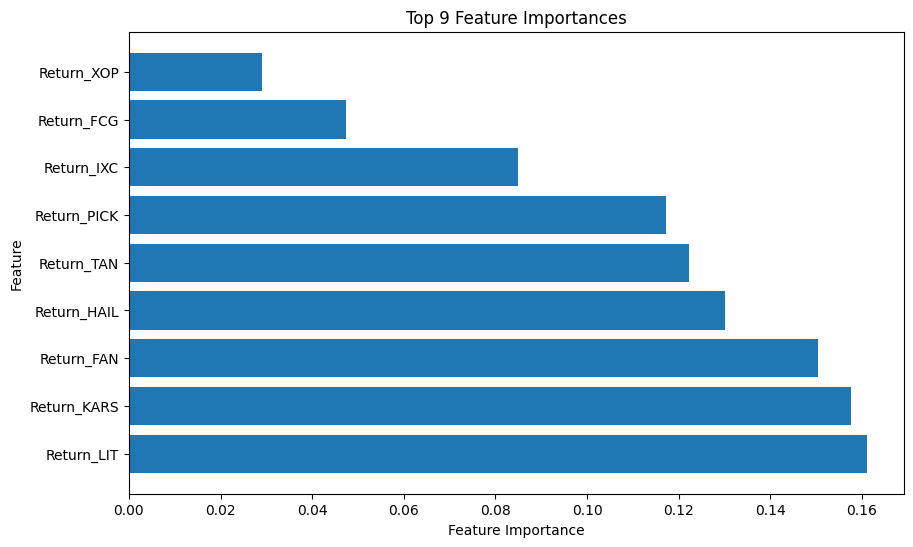

In [16]:
# Get feature importances from the trained model
feature_importances = gbm_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

In [17]:
y_pred_classification = gbm_classifier.predict(X_test)


gbm_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("GBM Accuracy:", gbm_accuracy)

GBM Accuracy: 0.5069124423963134


## k-NN Based on Yesterday's return

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train_classification
# Replace n_neighbors with the desired number of neighbors
# Replace other parameters as needed (e.g., weights, algorithm)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train_classification)

KNeighborsClassifier()

In [34]:
y_pred_classification = knn_classifier.predict(X_test)


knn_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("k-NN Accuracy:", knn_accuracy)

k-NN Accuracy: 0.5622119815668203


In [35]:
from matplotlib.colors import ListedColormap

# Define a function to plot the decision boundary for a k-NN classifier
def plot_decision_boundary(X, y, classifier, title):
    h = 0.02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colormap for decision regions
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # Bold colormap for data points

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

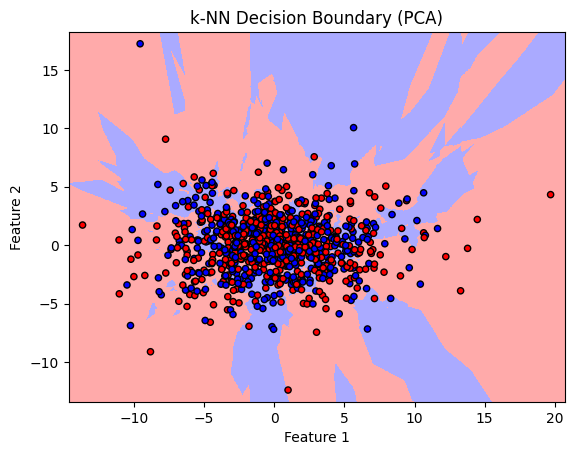

In [39]:
from sklearn.decomposition import PCA

# Reduce dimensionality of input data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
knn_pca_classifier = KNeighborsClassifier(n_neighbors=10)
knn_pca_classifier.fit(X_train_pca, y_train_classification)
# Plot decision boundary using reduced-dimensional input data
plot_decision_boundary(X_train_pca, y_train_classification, knn_pca_classifier, title='k-NN Decision Boundary (PCA)')

## Neural Networks Based on Yesterday's return

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # Assuming X_train.shape[1] is the number of features
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_classification, epochs=10, batch_size=32, validation_split=0.2)  # Assuming 10 epochs and batch size of 32

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_classification)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4848 - loss: 0.7886 - val_accuracy: 0.5029 - val_loss: 0.7068
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.5445 - loss: 0.6954 - val_accuracy: 0.5260 - val_loss: 0.6938
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.5659 - loss: 0.6878 - val_accuracy: 0.4971 - val_loss: 0.6954
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.5988 - loss: 0.6770 - val_accuracy: 0.4682 - val_loss: 0.7026
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.5702 - loss: 0.6748 - val_accuracy: 0.4913 - val_loss: 0.6988
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.6000 - loss: 0.6681 - val_accuracy: 0.4855 - val_loss: 0.7021
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.6026 - loss: 0.6621 - val_accuracy: 0.4971 - val_loss: 0.7011
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.5997 - loss: 0.6635 - val_accuracy: 0.4855 - val_lo

## Logistic Regression Based on n days rolling window

In [21]:
X_classification_2 = etfs[cols_2]
y_classification_2 = [(1 if return_val > 0 else 0) for return_val in tsla['Return_TSLA']]

y_classification_2 = y_classification_2[window_size-1:]
X_classification_2 = X_classification_2[window_size-1:]

len(y_classification_2), len(X_classification_2)

(1081, 1081)

In [22]:
X_train_2, X_test_2, y_train_classification_2, y_test_classification_2 = train_test_split(X_classification_2, y_classification_2, test_size=0.2, random_state=42)

X_train_2 = np.array(X_train_2)
X_test_2 = np.array(X_test_2)
y_train_classification_2 = np.array(y_train_classification_2)
y_test_classification_2 = np.array(y_test_classification_2)

classifier = LogisticRegression()
classifier.fit(X_train_2, y_train_classification_2)

LogisticRegression()

In [23]:
y_pred_classification_2 = classifier.predict(X_test_2)
classification_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("Classification Accuracy:", classification_accuracy)

Classification Accuracy: 0.6221198156682027


## Random Forest Model Based on n days rolling window

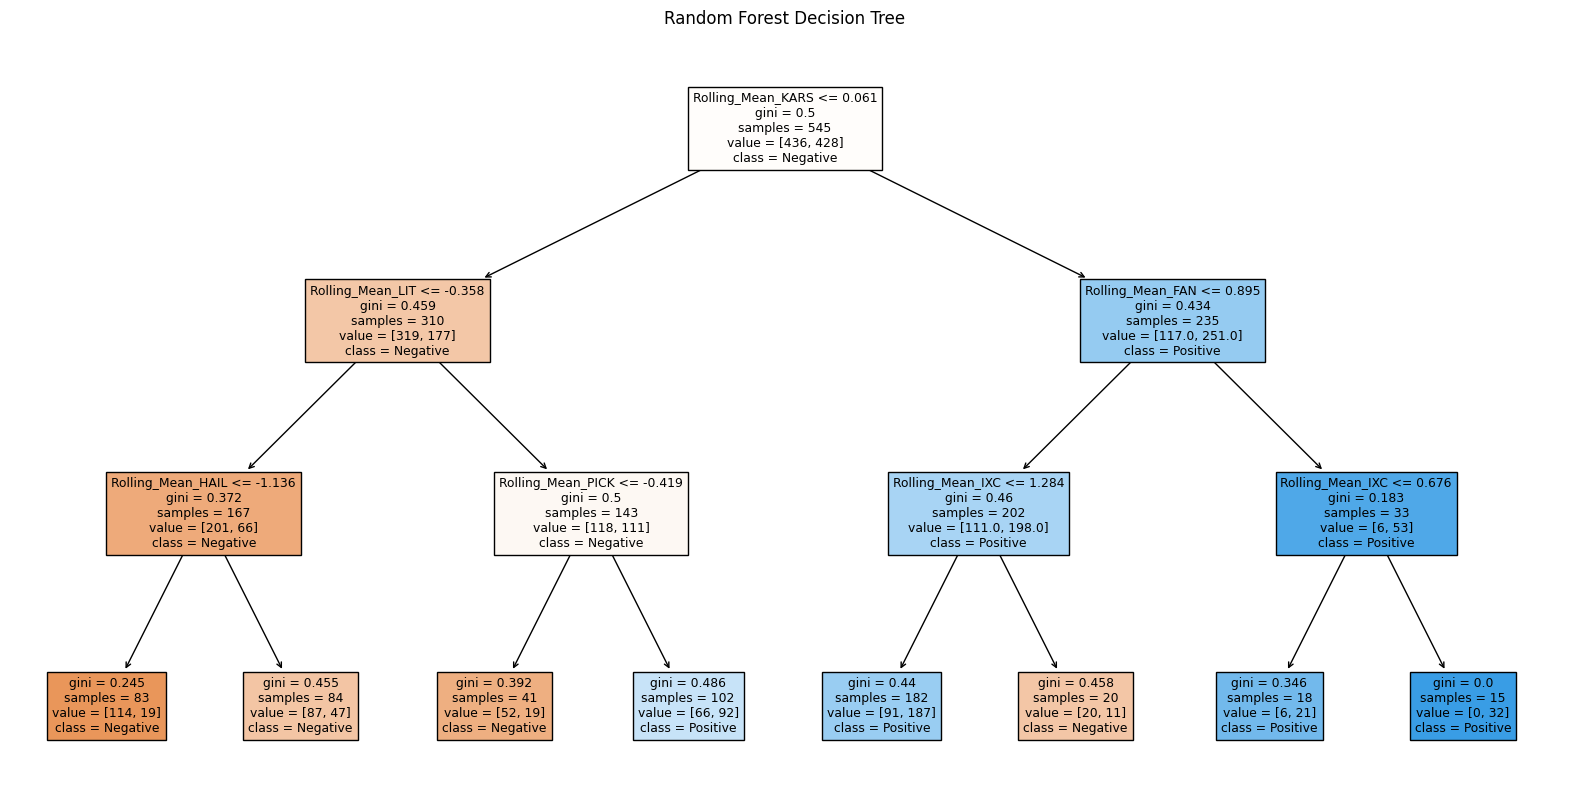

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_classifier.fit(X_train_2, y_train_classification_2)


plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=cols_2, class_names=['Negative', 'Positive'], filled=True)
plt.title('Random Forest Decision Tree')
plt.show()

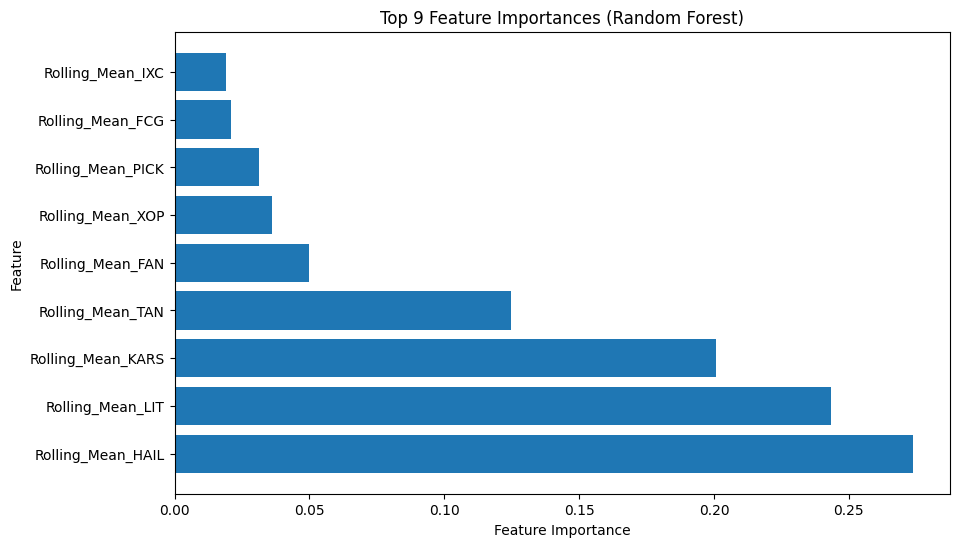

In [25]:
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols_2[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances (Random Forest)'.format(top_n))
plt.show()

In [26]:
y_pred_classification_2 = rf_classifier.predict(X_test_2)


randomtree_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("RandomTree Accuracy:", randomtree_accuracy)

RandomTree Accuracy: 0.6036866359447005


## Gradient Boosting Classifier Based on n days rolling window

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train_2, y_train_classification_2)

GradientBoostingClassifier(random_state=42)

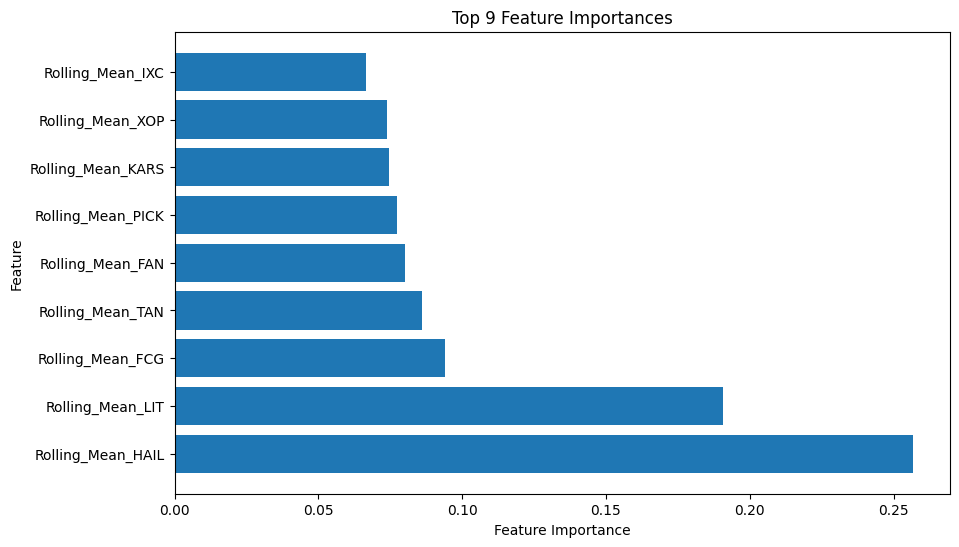

In [28]:
# Get feature importances from the trained model
feature_importances = gbm_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols_2[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

In [29]:
y_pred_classification_2 = gbm_classifier.predict(X_test_2)


gbm_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("GBM Accuracy:", gbm_accuracy)

GBM Accuracy: 0.5299539170506913


## k-NN Based on n days rolling window

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train_classification
# Replace n_neighbors with the desired number of neighbors
# Replace other parameters as needed (e.g., weights, algorithm)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_2, y_train_classification_2)

KNeighborsClassifier()

In [31]:
y_pred_classification_2 = knn_classifier.predict(X_test_2)


knn_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("k-NN Accuracy:", knn_accuracy)

k-NN Accuracy: 0.5622119815668203


## Neural Networks Based on n days rolling window

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_2,y_train_classification_2, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_2, y_test_classification)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5885 - loss: 0.6740 - val_accuracy: 0.6127 - val_loss: 0.6515
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.6593 - loss: 0.6192 - val_accuracy: 0.6185 - val_loss: 0.6499
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.6614 - loss: 0.6023 - val_accuracy: 0.6301 - val_loss: 0.6412
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.6558 - loss: 0.6231 - val_accuracy: 0.6416 - val_loss: 0.6366
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.7116 - loss: 0.5841 - val_accuracy: 0.6474 - val_loss: 0.6366
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.6969 - loss: 0.5825 - val_accuracy: 0.6705 - val_loss: 0.6307
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.7097 - loss: 0.5797 - val_accuracy: 0.6532 - val_loss: 0.6318
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.7018 - loss: 0.5931 - val_accuracy: 0.6705 - val_lo